In [7]:
run CarND_Vehicle_Detection.py

png 0.25098 0.564706
png_cv2 0.0243902 155.0
jpg 0 255
jpg_cv2 0 255
8792 8968
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
38.94 Seconds to train SVC...
Test Accuracy of SVC =  0.9575


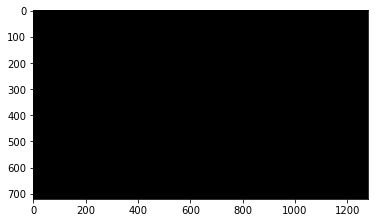

In [9]:
 %matplotlib inline
y_start_stop = [300, 660]
def process_frame(myimg,cspace):

    
    if(cspace in {'RGB','YCrCb'}):
        myimg1=myimg.astype(np.float32)/255
    else:
        myimg1=np.copy(myimg)
        
    draw_image = np.copy(myimg1)
    windows = slide_window(myimg1, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

    hot_windows = search_windows(myimg1, windows, svc, X_scaler, color_space=cspace, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
    return window_img


image = mpimg.imread('test_images/test5.jpg')



image = image.astype(np.float32)/255

res_image= process_frame(image,color_space)                  

plt.imshow(res_image)

In [3]:

x_png=mpimg.imread("./training/non-vehicles/GTI/image2.png")
print("png",np.min(x_png),np.max(x_png))
hsv_png = cv2.cvtColor(x_png, cv2.COLOR_RGB2LUV)
print("png_cv2",np.min(hsv_png),np.max(hsv_png))

jpg = mpimg.imread('./test_images/test6.jpg')
print("jpg",np.min(jpg),np.max(jpg))
hsv_jpg = cv2.cvtColor(jpg, cv2.COLOR_RGB2HLS)
print("jpg_cv2",np.min(hsv_jpg),np.max(hsv_jpg))



png 0.25098 0.564706
png_cv2 -8.75044 58.8321
jpg 0 255
jpg_cv2 0 255
